In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import neighbors
from math import sqrt

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
import os
import zipfile

# **2. Loading Dataset & Initial Data Exploration**

Here I have uploaeded the dataset and exploring the dataset to determine its shape and if it has any missing values. The dataset I callected from UC Irvine Machine Learning Repository which contains various health parameters from Bangladeshi patients. [Dataset Link](https://doi.org/10.24432/C5G020)

In [ ]:
kidney_disease = pd.read_csv('/content/drive/MyDrive/CSE424/kidney_disease.csv')
kidney_disease.head(10)

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,6,60,90,1.015,3,0,?,?,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,7,68,70,1.01,0,0,?,normal,notpresent,notpresent,...,36,?,?,no,no,no,good,no,no,ckd
7,8,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,9,52,100,1.015,3,0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,10,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
kidney_disease.shape

(400, 26)

In [ ]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       400 non-null    int64 
 1   'age'    400 non-null    object
 2   'bp'     400 non-null    object
 3   'sg'     400 non-null    object
 4   'al'     400 non-null    object
 5   'su'     400 non-null    object
 6   'rbc'    400 non-null    object
 7   'pc'     400 non-null    object
 8   'pcc'    400 non-null    object
 9   'ba'     400 non-null    object
 10  'bgr'    400 non-null    object
 11  'bu'     400 non-null    object
 12  'sc'     400 non-null    object
 13  'sod'    400 non-null    object
 14  'pot'    400 non-null    object
 15  'hemo'   400 non-null    object
 16  'pcv'    400 non-null    object
 17  'wbcc'   400 non-null    object
 18  'rbcc'   400 non-null    object
 19  'htn'    400 non-null    object
 20  'dm'     400 non-null    object
 21  'cad'    400 non-null    object
 22  'a

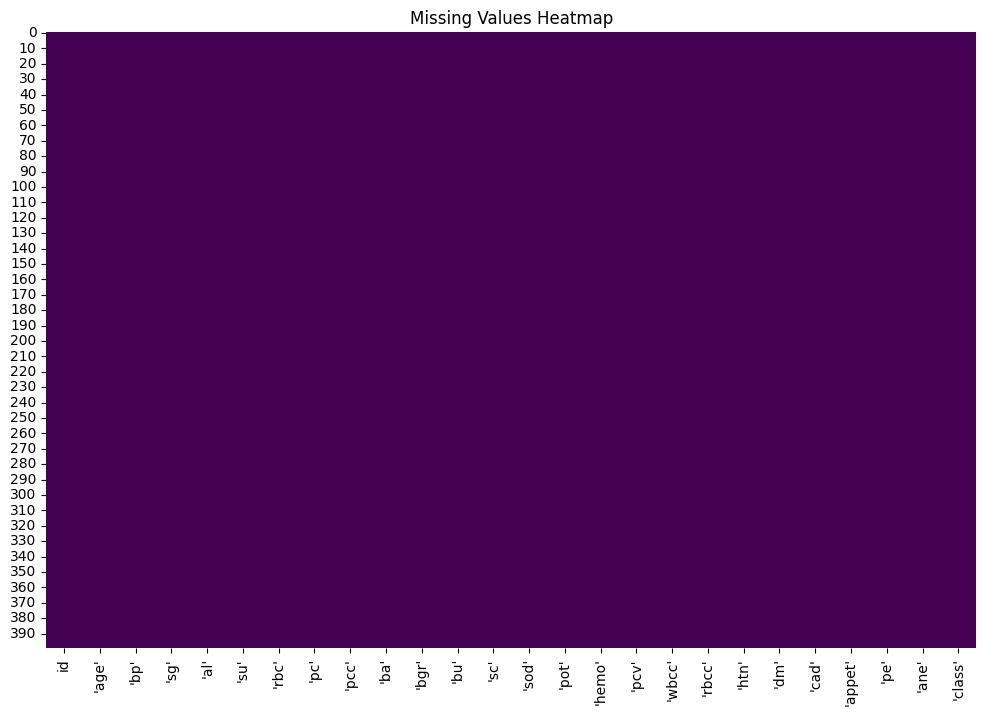

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(kidney_disease.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# **3. Data Cleaning & Pre-processing**

**i. Identifying missing values**

In [ ]:
kidney_disease.replace('?', np.nan, inplace=True)

print("Missing Values After Replacement:\n", kidney_disease.isnull().sum())

Missing Values After Replacement:
 id           0
'age'        9
'bp'        12
'sg'        47
'al'        46
'su'        49
'rbc'      152
'pc'        65
'pcc'        4
'ba'         4
'bgr'       44
'bu'        19
'sc'        17
'sod'       87
'pot'       88
'hemo'      52
'pcv'       71
'wbcc'     106
'rbcc'     131
'htn'        2
'dm'         2
'cad'        2
'appet'      1
'pe'         1
'ane'        1
'class'      0
dtype: int64


In [ ]:
kidney_disease.head(10)

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,6,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,7,68,70,1.01,0,0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,8,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,9,52,100,1.015,3,0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,10,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


**ii. Imputing misssing values using**

Using 'Median' for Numerical columns and 'Most frequent value' for categorical columns.

In [ ]:
numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


num_imputer = SimpleImputer(strategy='mean')

# Remove leading/trailing single quotes from column names
kidney_disease.columns = kidney_disease.columns.str.strip("'")

# Ensure numerical_cols are present in the DataFrame (case-insensitive)
numerical_cols = [col for col in numerical_cols if col in kidney_disease.columns.str.lower().tolist()]

# Fit and transform the data using the verified numerical columns
kidney_disease[numerical_cols] = num_imputer.fit_transform(kidney_disease[numerical_cols])

# Initialize imputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Ensure categorical_cols are present in the DataFrame (case-insensitive)
categorical_cols = [col for col in categorical_cols if col in kidney_disease.columns.str.lower().tolist()]

# Fit and transform the data using the verified categorical columns
kidney_disease[categorical_cols] = cat_imputer.fit_transform(kidney_disease[categorical_cols])


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
kidney_disease[['wbcc', 'rbcc']] = imputer.fit_transform(kidney_disease[['wbcc', 'rbcc']])

In [ ]:
print("Missing Values After Imputation:\n", kidney_disease.isnull().sum())

Missing Values After Imputation:
 id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


**iii. Handling Outliers**

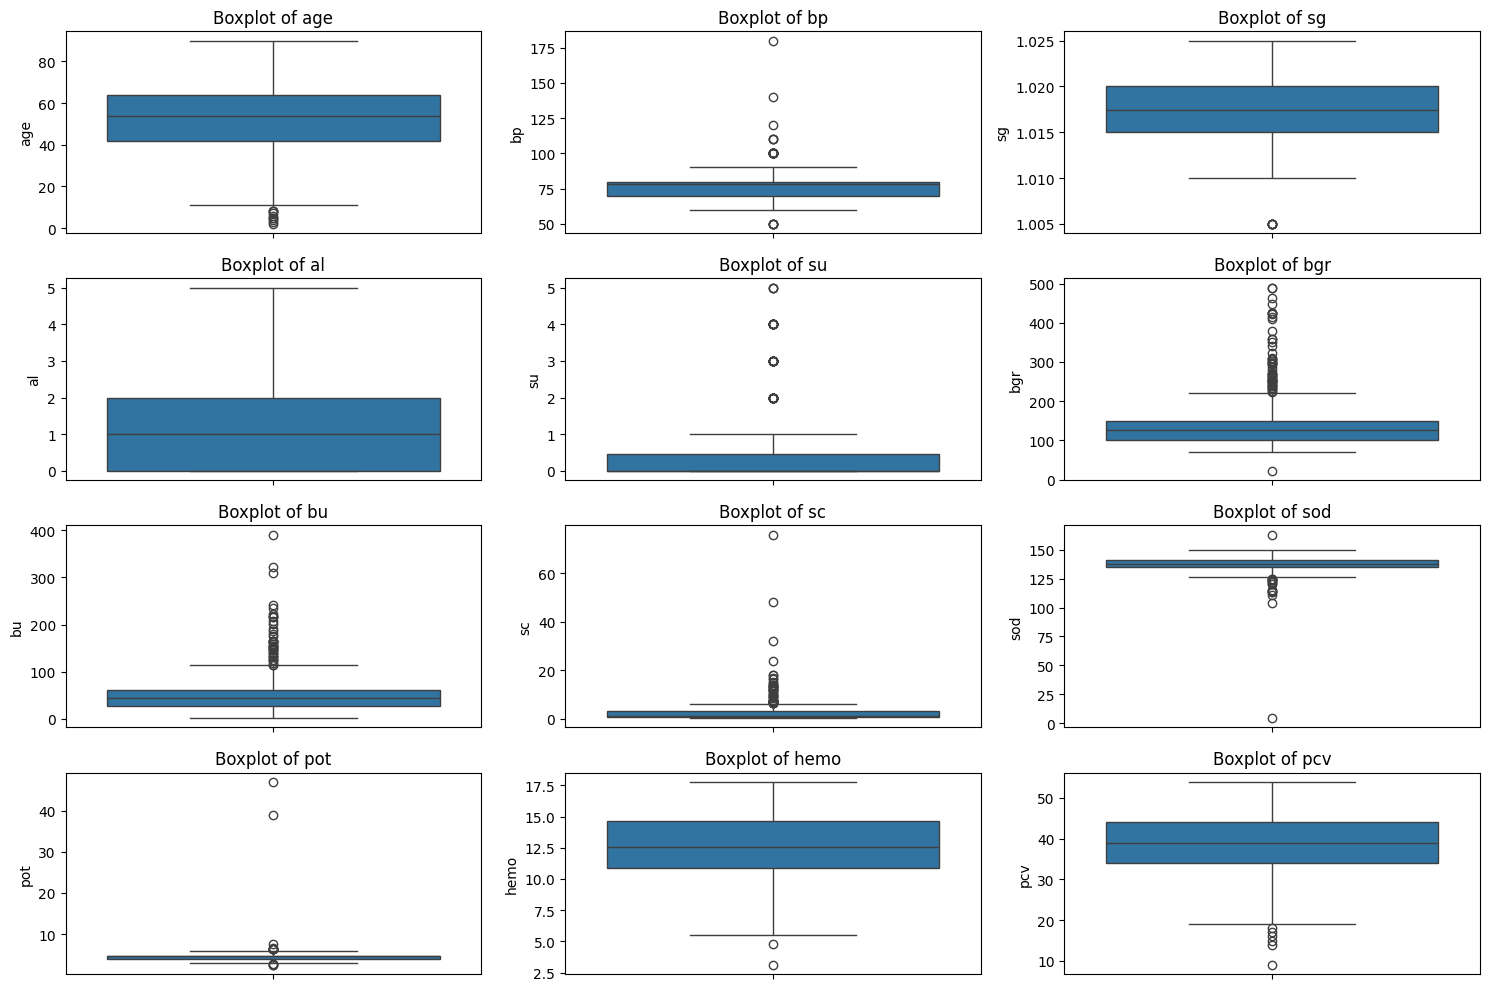

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=kidney_disease[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(kidney_disease[numerical_cols]))
threshold = 3

# Filter out rows where any Z-score exceeds the threshold
kidney_disease = kidney_disease[(z_scores < threshold).all(axis=1)]

print(f"Dataset shape after removing outliers: {kidney_disease.shape}")

Dataset shape after removing outliers: (360, 26)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
le = LabelEncoder()
for col in binary_cols:
    kidney_disease.loc[:, col] = le.fit_transform(kidney_disease[col])

X = kidney_disease.drop('class', axis=1)
y = kidney_disease['class']

scaler = StandardScaler()
kidney_disease.loc[:, numerical_cols] = scaler.fit_transform(kidney_disease[numerical_cols])

# Exploratory Data Analysis (EDA)

In [ ]:
kidney_disease.drop('id', axis=1, inplace=True)
kidney_disease.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.168805,0.383651,0.414421,0.056895,-0.397412,1,1,0,0,-0.261759,...,0.567969,7800.0,5.20,1,1,0,0,0,0,0
1,-2.544290,-2.175855,0.414421,2.483506,-0.397412,1,1,0,0,0.244908,...,-0.208359,6000.0,5.74,0,0,0,0,0,0,0
3,-0.168805,-0.469518,-2.352888,2.483506,-0.397412,1,0,1,0,-0.336719,...,-0.984688,6700.0,3.90,1,0,0,1,1,1,0
4,0.005011,0.383651,-1.430451,0.865766,-0.397412,1,1,0,0,-0.542860,...,-0.596523,7300.0,4.60,0,0,0,0,0,0,0
5,0.526458,1.236820,-0.508015,1.674636,-0.397412,1,1,0,0,-1.142544,...,-0.078971,7800.0,4.40,1,1,0,0,1,0,0


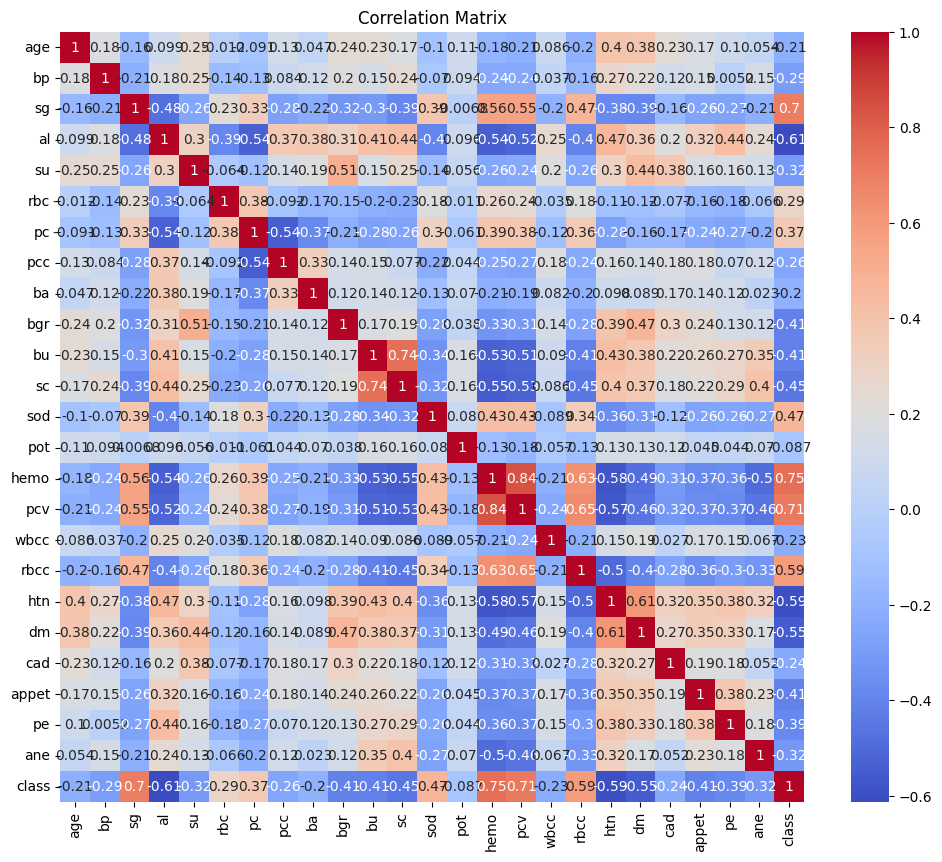

In [ ]:
plt.figure(figsize=(12,10))
corr = kidney_disease.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

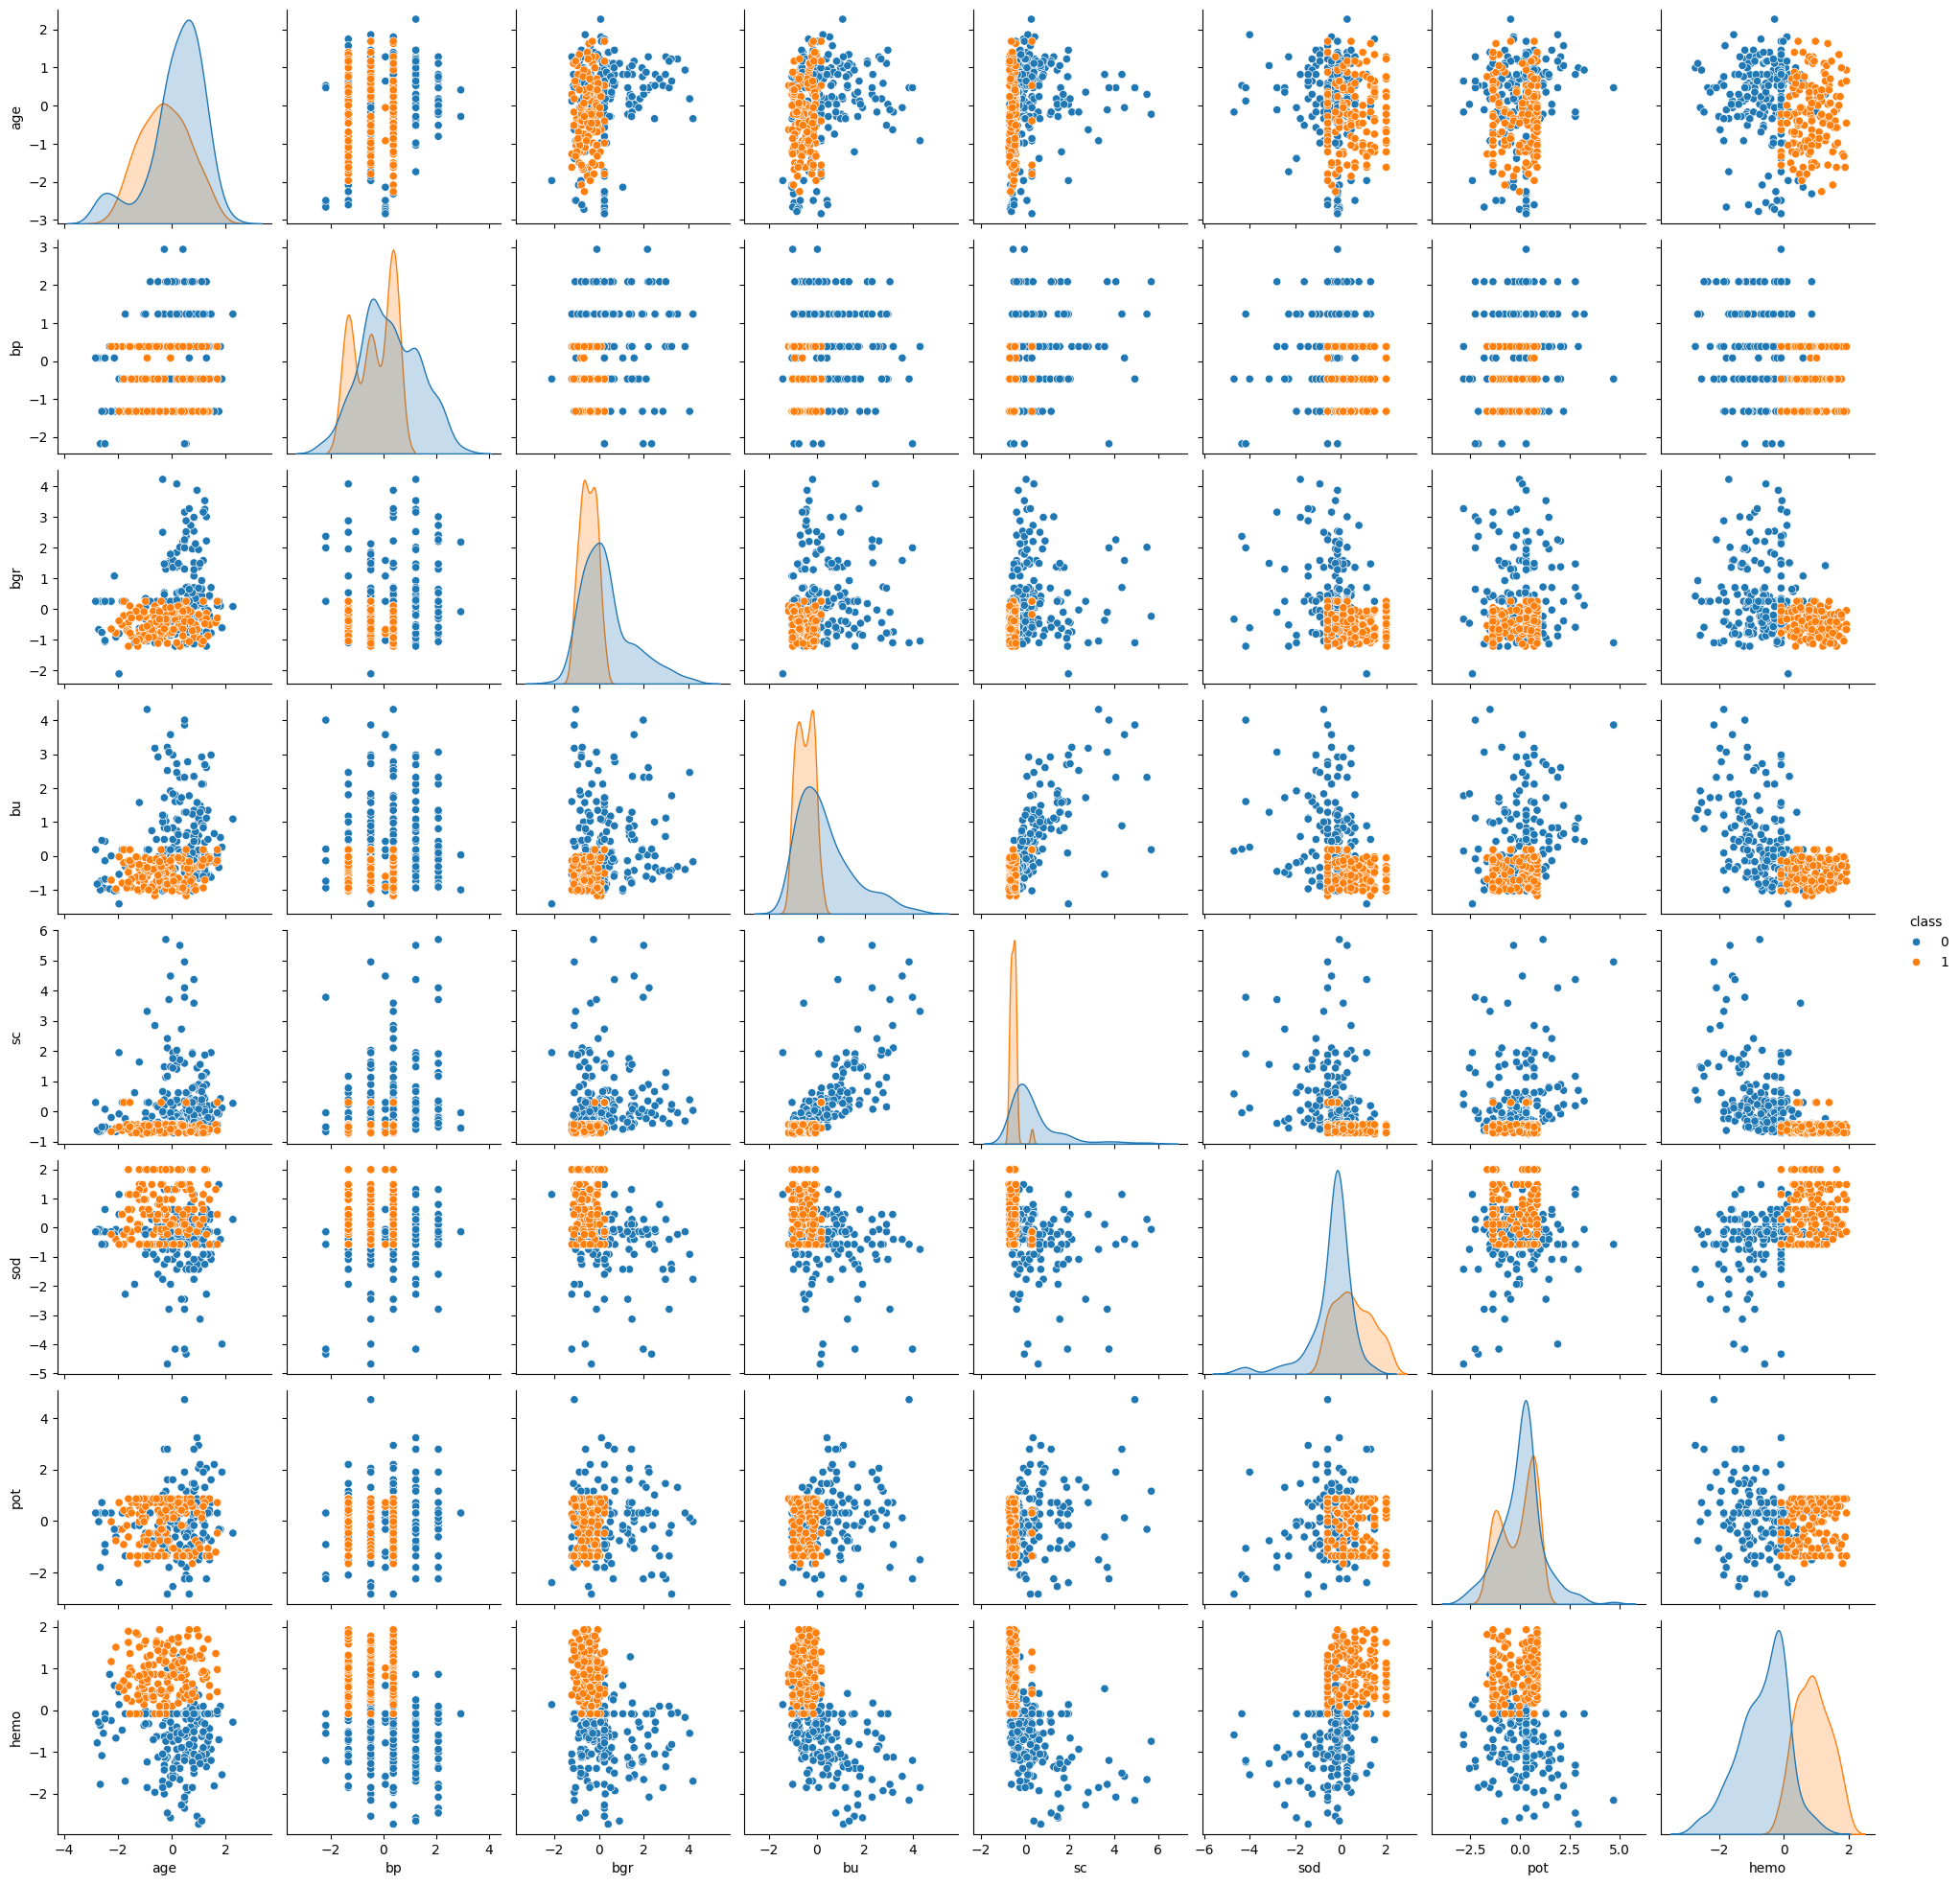

In [ ]:

selected_features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'class']

sns.pairplot(kidney_disease[selected_features], hue='class', diag_kind='kde')
plt.show()


# Feature Scaling

In [ ]:
# Selecting features with higher correlation to the target
selected_features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

X = kidney_disease[selected_features]
y = kidney_disease['class'].astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.194, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (290, 8), Testing Set: (70, 8)


In [ ]:
# Check the data type of y
print("Data Type of y:", y.dtype)

# Check unique values in y
print("Unique Values in y:", y.unique())


Data Type of y: int64
Unique Values in y: [0 1]


# Used Models

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

#Support Vector Machine
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)


#k-Knearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

#XGBoost Classifier
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}\n")


In [ ]:
# Logistic Regression Predictions
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:,1]

# Random Forest Predictions
y_pred_rf = rf_classifier.predict(X_test)
y_prob_rf = rf_classifier.predict_proba(X_test)[:,1]

# SVM Predictions
y_pred_svm = svm_classifier.predict(X_test)
y_prob_svm = svm_classifier.predict_proba(X_test)[:,1]

# k-NN Predictions
y_pred_knn = knn_classifier.predict(X_test)
y_prob_knn = knn_classifier.predict_proba(X_test)[:,1]

# XGBoost Predictions
y_pred_xgb = xgb_classifier.predict(X_test)
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:,1]


In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest Classifier")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, y_prob_svm, "Support Vector Machine")

# Evaluate k-NN
evaluate_model(y_test, y_pred_knn, y_prob_knn, "k-Nearest Neighbors")

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost Classifier")


--- Logistic Regression ---
Confusion Matrix:
[[38  3]
 [ 2 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.90      0.93      0.92        29

    accuracy                           0.93        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.93      0.93      0.93        70

Accuracy: 0.9286
ROC-AUC: 0.9765

--- Random Forest Classifier ---
Confusion Matrix:
[[40  1]
 [ 2 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.96      0.93      0.95        29

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.96        70
weighted avg       0.96      0.96      0.96        70

Accuracy: 0.9571
ROC-AUC: 0.9945

--- Support Vector Machine ---
Confusion Matrix:
[[38  3]
 [ 2 27]]

Classification Report:
   

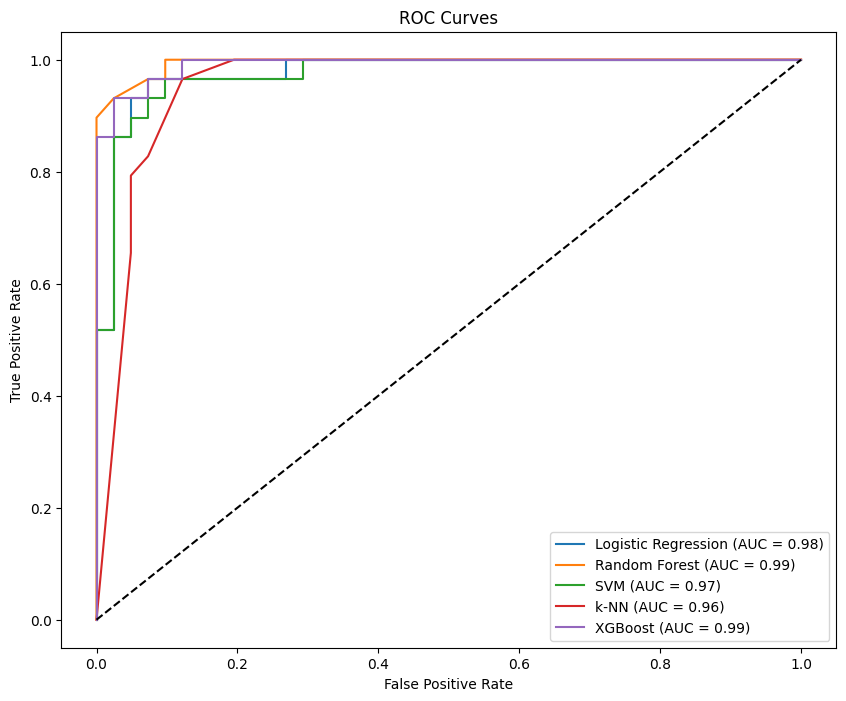

In [ ]:
plt.figure(figsize=(10,8))


def plot_roc(y_true, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_prob):.2f})')


plot_roc(y_test, y_prob_log, "Logistic Regression")
plot_roc(y_test, y_prob_rf, "Random Forest")
plot_roc(y_test, y_prob_svm, "SVM")
plot_roc(y_test, y_prob_knn, "k-NN")
plot_roc(y_test, y_prob_xgb, "XGBoost")


plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


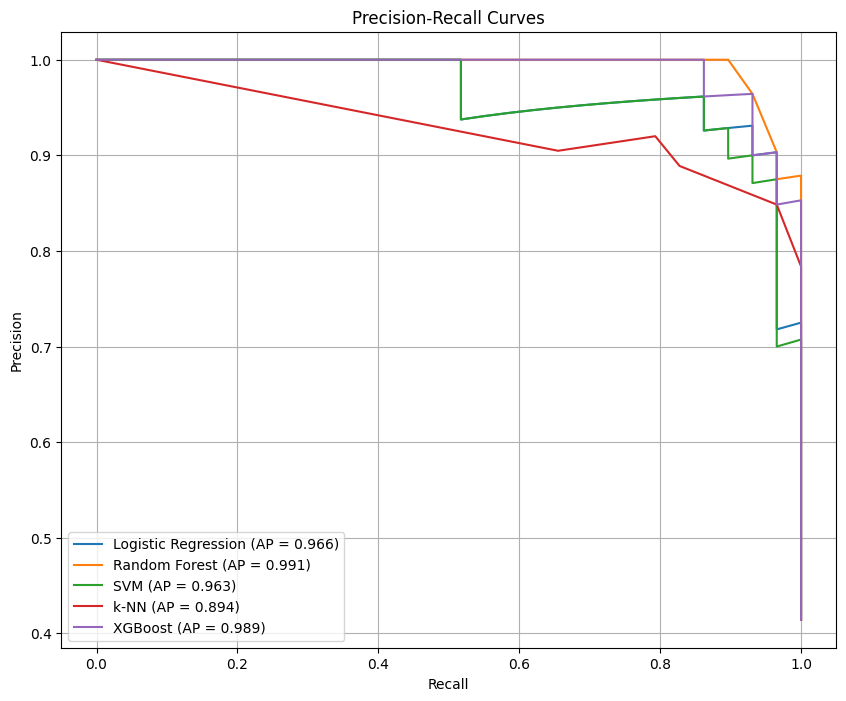

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score


plt.figure(figsize=(10, 8))

def plot_precision_recall(y_true, y_prob, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    average_precision = average_precision_score(y_true, y_prob)
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision:.3f})')


plot_precision_recall(y_test, y_prob_log, "Logistic Regression")
plot_precision_recall(y_test, y_prob_rf, "Random Forest")
plot_precision_recall(y_test, y_prob_svm, "SVM")
plot_precision_recall(y_test, y_prob_knn, "k-NN")
plot_precision_recall(y_test, y_prob_xgb, "XGBoost")


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


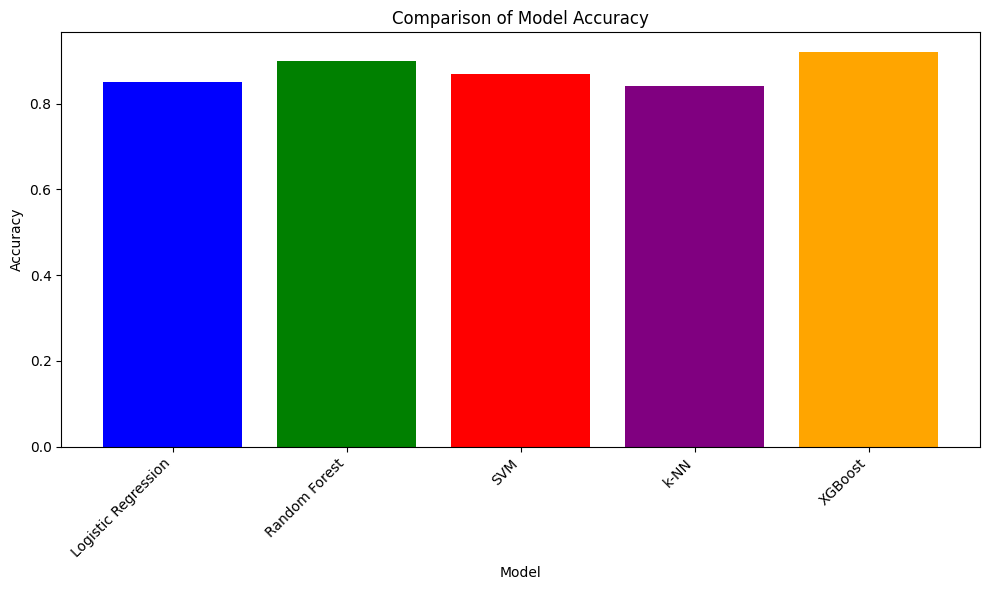

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracy scores
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'k-NN', 'XGBoost']
accuracy_scores = [0.85, 0.90, 0.87, 0.84, 0.92]

# Colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create bar chart with different colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()